## Import libraries

In [311]:
import os
import pandas as pd
from google.colab import drive

## Configure Project Path and other paths

In [312]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [313]:
proj_path = '/content/drive/MyDrive/Magnimind/Face_detection/MP'
os.chdir(proj_path)

In [314]:
train_csv_path = os.path.join(proj_path, 'train_3D.csv')
test_csv_path = os.path.join(proj_path, 'test_3D.csv')

## Read data from csv to pandas dataframe

In [315]:
train_df = pd.read_csv(train_csv_path)
test_df = pd.read_csv(test_csv_path)

In [316]:
train_df.head()

,img_path,image_num,label,landmark_0_x,landmark_0_y,landmark_0_z,landmark_1_x,landmark_1_y,landmark_1_z,landmark_2_x,...,landmark_464_z,landmark_465_x,landmark_465_y,landmark_465_z,landmark_466_x,landmark_466_y,landmark_466_z,landmark_467_x,landmark_467_y,landmark_467_z
0,/content/drive/MyDrive/Magnimind/Face_detectio...,839,Autistic,0.511593,0.709910,-0.040127,0.517181,0.670308,-0.168715,0.515403,...,-0.057532,0.587559,0.500262,-0.077599,0.768636,0.474503,-0.021161,0.784336,0.468965,-0.021392
1,/content/drive/MyDrive/Magnimind/Face_detectio...,825,Autistic,0.566339,0.733220,-0.065258,0.575596,0.677747,-0.127426,0.568713,...,0.001300,0.609449,0.556148,-0.015839,0.738344,0.541875,0.039996,0.751471,0.531839,0.042270
2,/content/drive/MyDrive/Magnimind/Face_detectio...,817,Autistic,0.437217,0.744490,-0.077209,0.426740,0.685478,-0.165941,0.433244,...,-0.018598,0.488665,0.551752,-0.038808,0.656447,0.535078,0.003090,0.674554,0.525373,0.003349
3,/content/drive/MyDrive/Magnimind/Face_detectio...,845,Autistic,0.533727,0.797597,-0.053682,0.549781,0.762331,-0.169223,0.540980,...,-0.035548,0.601406,0.623819,-0.057016,0.766676,0.603243,0.013871,0.782729,0.596054,0.015662
4,/content/drive/MyDrive/Magnimind/Face_detectio...,844,Autistic,0.524054,0.774706,-0.052582,0.505436,0.710976,-0.152662,0.512779,...,-0.039194,0.528307,0.568924,-0.058087,0.683886,0.525732,-0.016595,0.697740,0.517121,-0.017281


In [317]:
test_df.head()

,img_path,image_num,label,landmark_0_x,landmark_0_y,landmark_0_z,landmark_1_x,landmark_1_y,landmark_1_z,landmark_2_x,...,landmark_464_z,landmark_465_x,landmark_465_y,landmark_465_z,landmark_466_x,landmark_466_y,landmark_466_z,landmark_467_x,landmark_467_y,landmark_467_z
0,/content/drive/MyDrive/Magnimind/Face_detectio...,100,Autistic,0.727391,0.710138,-0.117875,0.753489,0.581854,-0.193980,0.723864,...,0.048919,0.737665,0.421433,0.016144,0.890724,0.401811,0.169311,0.903891,0.394724,0.177334
1,/content/drive/MyDrive/Magnimind/Face_detectio...,108,Autistic,0.457443,0.710929,-0.091133,0.437796,0.633989,-0.193647,0.445459,...,-0.020685,0.482040,0.471925,-0.044690,0.660659,0.437236,0.013672,0.679693,0.424461,0.015152
2,/content/drive/MyDrive/Magnimind/Face_detectio...,106,Autistic,0.452099,0.779923,-0.042830,0.453784,0.726497,-0.181251,0.455887,...,-0.063696,0.546055,0.521134,-0.084867,0.749610,0.499630,-0.035831,0.771000,0.490222,-0.036383
3,/content/drive/MyDrive/Magnimind/Face_detectio...,1,Autistic,0.457504,0.754957,-0.085740,0.470419,0.687706,-0.211908,0.467041,...,-0.034361,0.565713,0.535771,-0.059295,0.783299,0.529403,0.008190,0.804902,0.522787,0.009052
4,/content/drive/MyDrive/Magnimind/Face_detectio...,103,Autistic,0.362426,0.740446,-0.046425,0.366750,0.668341,-0.156865,0.372543,...,-0.048113,0.491366,0.545638,-0.066218,0.686309,0.559731,-0.032427,0.705237,0.556214,-0.034047


In [318]:
train_df['label'].value_counts()

Autistic        1270
Non_Autistic     810
Name: label, dtype: int64

In [319]:
train_df[train_df.duplicated()]

,img_path,image_num,label,landmark_0_x,landmark_0_y,landmark_0_z,landmark_1_x,landmark_1_y,landmark_1_z,landmark_2_x,...,landmark_464_z,landmark_465_x,landmark_465_y,landmark_465_z,landmark_466_x,landmark_466_y,landmark_466_z,landmark_467_x,landmark_467_y,landmark_467_z


In [320]:
test_df['label'].value_counts()

Autistic        150
Non_Autistic    150
Name: label, dtype: int64

In [321]:

test_df[test_df.duplicated()]

,img_path,image_num,label,landmark_0_x,landmark_0_y,landmark_0_z,landmark_1_x,landmark_1_y,landmark_1_z,landmark_2_x,...,landmark_464_z,landmark_465_x,landmark_465_y,landmark_465_z,landmark_466_x,landmark_466_y,landmark_466_z,landmark_467_x,landmark_467_y,landmark_467_z


## Setting input features and output features

In [322]:
X = train_df.drop(columns=['img_path', 'image_num', 'label'])
y = train_df['label']

In [323]:
y.value_counts()

Autistic        1270
Non_Autistic     810
Name: label, dtype: int64

In [324]:
y = y.map({'Autistic': 1, 'Non_Autistic': 0})

In [325]:
y.value_counts()

1    1270
0     810
Name: label, dtype: int64

In [326]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, stratify=y, shuffle=True, random_state=72)

In [327]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(random_state=72)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [328]:
X_test = test_df.drop(columns=['img_path', 'image_num', 'label'])
y_test = test_df['label']
y_test = y_test.map({'Autistic': 1, 'Non_Autistic': 0})

In [329]:
# Initializing random_state
random_state = 72

In [330]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import os
from PIL import Image
from skimage import io, filters
from scipy import ndimage
import tensorflow as tf
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import LSTM, Dense, Flatten


In [331]:
X_train_smote.shape


(2032, 1404)

In [332]:
# Define constants
timesteps = 468  # Number of landmarks
features = 3     # Each landmark is a 3D feature(x, y, z)
batch_size = 32

In [333]:
X_train_reshaped = np.array(X_train_smote).reshape(X_train_smote.shape[0], timesteps, features)
X_val_reshaped = np.array(X_val).reshape(X_val.shape[0], timesteps, features)
X_test_reshaped = np.array(X_test).reshape(X_test.shape[0], timesteps, features)

In [334]:
model = Sequential([
    LSTM(64, activation='relu', return_sequences=True, input_shape=(timesteps, features)),
    Dropout(0.2),
    LSTM(32, activation='relu'),
    Dropout(0.2),
    # We are using binary classification model to identify whether the given kid
    # has autism or not.
    Dense(1, activation='sigmoid')
])

In [335]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_21 (LSTM)              (None, 468, 64)           17408     
                                                                 
 dropout (Dropout)           (None, 468, 64)           0         
                                                                 
 lstm_22 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29857 (116.63 KB)
Trainable params: 29857 (116.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [336]:
rnn_weights_filepath = 'RNN_weights_best.hdf5'
if os.path.exists(rnn_weights_filepath):
    model.load_weights(rnn_weights_filepath)

In [337]:
from keras.optimizers import Adam
# Set a custom learning rate
learning_rate = 0.0001

In [338]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                       tf.keras.metrics.Precision(name='precision'),
                       tf.keras.metrics.Recall(name='recall')])

In [339]:
# Define callbacks
callbacks = []

# Saving checkpoints
checkpoint = ModelCheckpoint(rnn_weights_filepath,
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True, mode='min')
callbacks.append(checkpoint)

# Define early_stopping.
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=10,
                               verbose=1,
                               restore_best_weights=True)
callbacks.append(early_stopping)

# Define the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.1,
                              patience=3)
callbacks.append(reduce_lr)

In [340]:
#set a seed
seed = 72
np.random.seed(seed)

In [341]:
history = model.fit(X_train_reshaped,
                    y_train_smote,
                    epochs=20,
                    callbacks=callbacks,
                    validation_data=(X_val_reshaped, y_val))

Epoch 1/20
64/64 [==============================] - ETA: 0s - loss: 0.6939 - accuracy: 0.4911 - precision: 0.4563 - recall: 0.0925
Epoch 1: val_loss improved from inf to 0.69541, saving model to RNN_weights_best.hdf5
64/64 [==============================] - 31s 420ms/step - loss: 0.6939 - accuracy: 0.4911 - precision: 0.4563 - recall: 0.0925 - val_loss: 0.6954 - val_accuracy: 0.3894 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 1.0000e-04
Epoch 2/20


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


64/64 [==============================] - ETA: 0s - loss: 0.6933 - accuracy: 0.4892 - precision: 0.4673 - recall: 0.1545
Epoch 2: val_loss improved from 0.69541 to 0.69474, saving model to RNN_weights_best.hdf5
64/64 [==============================] - 28s 445ms/step - loss: 0.6933 - accuracy: 0.4892 - precision: 0.4673 - recall: 0.1545 - val_loss: 0.6947 - val_accuracy: 0.3894 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 1.0000e-04
Epoch 3/20
64/64 [==============================] - ETA: 0s - loss: 0.6930 - accuracy: 0.5079 - precision: 0.5282 - recall: 0.1476
Epoch 3: val_loss did not improve from 0.69474
64/64 [==============================] - 31s 485ms/step - loss: 0.6930 - accuracy: 0.5079 - precision: 0.5282 - recall: 0.1476 - val_loss: 0.6949 - val_accuracy: 0.3894 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 1.0000e-04
Epoch 4/20
64/64 [==============================] - ETA: 0s - loss: 0.6930 - accuracy: 0.5054 - precision: 0.5193 - recall: 0.1457
Epo

In [342]:
model.load_weights("RNN_weights_best.hdf5")

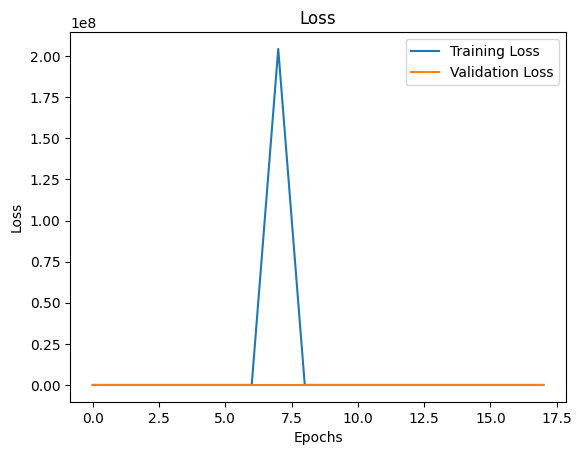

In [343]:
# Plot the loss curve
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

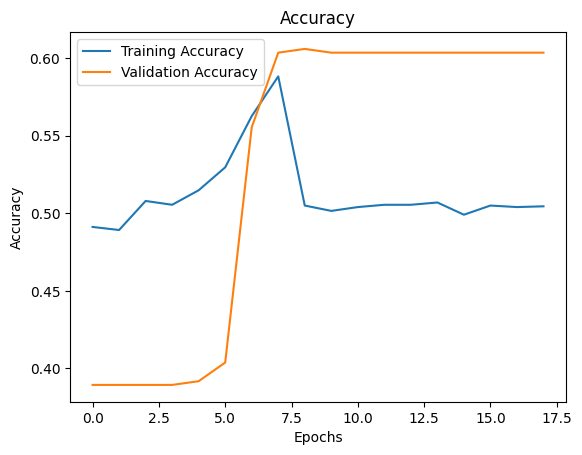

In [344]:
# Plot the precision curve
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [345]:
# Evaluate model on train data
train_eval_results = model.evaluate(X_train_reshaped, y_train_smote, batch_size=32)
print(f'Accuracy: {train_eval_results[1]}')
print(f'Precision: {train_eval_results[2]}')
print(f'Recall: {train_eval_results[3]}')
precision = train_eval_results[2]
recall = train_eval_results[3]
f1_score = 2 * (precision * recall) / (precision + recall)

print(f'F1-score: {f1_score}')

64/64 [==============================] - 6s 85ms/step - loss: 0.6897 - accuracy: 0.5059 - precision: 0.5030 - recall: 0.9852
Accuracy: 0.5059055089950562
Precision: 0.5030151009559631
Recall: 0.9852362275123596
F1-score: 0.6660013547008238


In [346]:
# Evaluate model on val data
val_eval_results = model.evaluate(X_val_reshaped, y_val, batch_size=32)
print(f'Accuracy: {val_eval_results[1]}')
print(f'Precision: {val_eval_results[2]}')
print(f'Recall: {val_eval_results[3]}')
precision = val_eval_results[2]
recall = val_eval_results[3]
f1_score = 2 * (precision * recall) / (precision + recall)
print(f'F1-score: {f1_score}')

13/13 [==============================] - 1s 86ms/step - loss: 0.6715 - accuracy: 0.6034 - precision: 0.6099 - recall: 0.9724
Accuracy: 0.6033653616905212
Precision: 0.6098765134811401
Recall: 0.9724409580230713
F1-score: 0.7496206187770607


In [347]:
# Evaluate model on test data
test_eval_results = model.evaluate(X_test_reshaped, y_test, batch_size=32)
print(f'Accuracy: {test_eval_results[1]}')
precision = test_eval_results[2]
recall = test_eval_results[3]
print(f'Precision: {precision}')
print(f'Recall: {recall}')

f1_score = 2 * (precision * recall) / (precision + recall)
print(f'F1-score: {f1_score}')

10/10 [==============================] - 1s 85ms/step - loss: 0.6873 - accuracy: 0.5133 - precision: 0.5068 - recall: 0.9867
Accuracy: 0.5133333206176758
Precision: 0.5068492889404297
Recall: 0.9866666793823242
F1-score: 0.6696832380409802


10/10 [==============================] - 2s 133ms/step


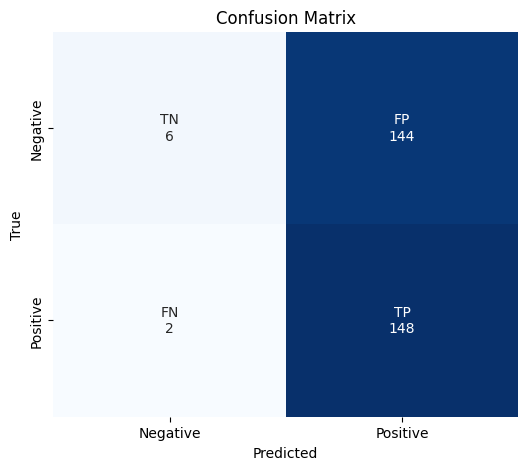

In [348]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Prediction on test set
predictions = model.predict(X_test_reshaped)
predictions = predictions.flatten()  # Convert predictions to 1D array if necessary

# Apply 0.5 threshold
predictions_binary = np.where(predictions > 0.5, 1, 0)

# True Labels
true_labels = y_test

# Compute Confusion Matrix
conf_matrix = confusion_matrix(true_labels, predictions_binary)

# Extract individual elements
TN, FP, FN, TP = conf_matrix.ravel()

# Create a new confusion matrix with labels
conf_matrix_labelled = np.array([[f"TN\n{TN}", f"FP\n{FP}"], [f"FN\n{FN}", f"TP\n{TP}"]])

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
ax = sns.heatmap(conf_matrix, annot=conf_matrix_labelled, fmt='', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
ax.set_xticklabels(['Negative', 'Positive'])
ax.set_yticklabels(['Negative', 'Positive'])
plt.show()